In [79]:
def clean_text (pokemon_file):
    '''The method takes a textfile as a parameter.
    The textfile must have a format where the heading is: (width (cm), height (cm)),
    and each line looks similar to: (20.11541438766307, 28.701809671168824).
    The method returns a list of lists, where each inner list consists of two float values,
    where the first value is the width and the second value is the height.'''
    pokemon_size = [pokemon.strip("\n") for pokemon in pokemon_file.readlines()] #readlines reads each line in the textfile and stores each line as a string element in a list. We remove "\n" for each line (which automatically gets added when running readlines)
    pokemon_size.remove("(width (cm), height (cm))") #Removes the heading
    pokemon_size = [pokemon.replace("(","").replace(")", "") for pokemon in pokemon_size] #For each element replace the left and right paranthesis with an empty string "".
    pokemon_size = [pokemon.split(",") for pokemon in pokemon_size] #split(",") creates lists (splitted at the commma that separates the strings in the larger list) out of all elements. Each list contains the values width and height. 
    pokemon_size = [([float(pokemon[0]), float(pokemon[1])]) for pokemon in pokemon_size] #The code changes the first (width) and second (element) in each inner list in pokemon_size to floats.  
    return pokemon_size

In [80]:
with open("pichu.txt", mode = "r") as pichu, open("pikachu.txt", mode = "r") as pikachu:
    #Creates lists of data for Pichu
    pichu_size = clean_text(pichu) #Runs the clean_text function on pichu
    pichu_width = [pichu_size[i][0] for i in range(len(pichu_size))] #Creates one list that contains only the first element (width) from each inner list in pichu_size.
    pichu_height = [pichu_size[i][1] for i in range(len(pichu_size))] #Creates one list that contains only the second element (height) from each inner list in pichu_size.
    print(pichu_size)

    #Creates lists of data for Pikachu
    pikachu_size = clean_text(pikachu)
    pikachu_width = [pikachu_size[i][0] for i in range(len(pikachu_size))]
    pikachu_height = [pikachu_size[i][1] for i in range(len(pikachu_size))]
    print(pikachu_size)

[[20.11541438766307, 28.701809671168824], [15.200086041781336, 27.095070307714877], [17.200234546952956, 27.669778220491132], [16.785685905190583, 34.36654587712494], [20.8917697133121, 31.480353852465935], [20.41359589938329, 31.091310056669883], [22.137436541638763, 26.71138648198097], [15.695510661035328, 32.291267979503495], [18.375374557482164, 26.634024937619284], [15.238377755504562, 28.794554417576478], [16.749103798428827, 34.895233506365955], [19.042842304826898, 31.399997598540928], [15.212287757470909, 30.569497437746463], [16.59070120549319, 31.846142509898748], [20.199075502236184, 33.4285192018981], [19.35953184482573, 32.75999911546245], [16.763524976325574, 27.290480719641042], [19.71412547100727, 25.321002439040377], [21.475443653422612, 28.154530480590818], [15.051990077424488, 27.67740875975703], [21.446554014662464, 27.109828435863264], [20.585115159905815, 34.429097143350546], [17.722004132143937, 33.76367626472669], [16.24383599849425, 28.14677880798478], [22.657

Text(0.5, 1.0, 'Height and Width for Pichu (blue) and Pikachu (orange)')

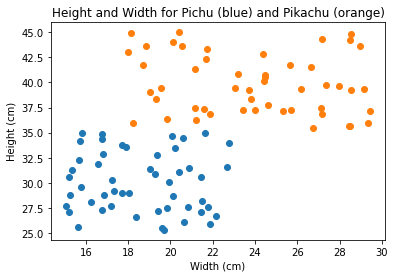

In [226]:
import matplotlib.pyplot as plt

plt.scatter(pichu_width, pichu_height)
plt.scatter(pikachu_width, pikachu_height)
plt.ylabel("Height (cm)")
plt.xlabel("Width (cm)")
plt.title("Height and Width for Pichu (blue) and Pikachu (orange)")

In [82]:
with open("test_points.txt", mode = "r") as test:
    test_p = test.readlines() #readlines reads the line in the textfile and stores it as a string element in a list
    test_p = test_p[0].split(")") #Splits the element (element 0) in the list at the closing paranthesis
    test_p = [point.replace(", (","").replace("(", "") for point in test_p] #replace(", (","") replaces comma-space-open_paranthesis with an empty string and replace("(", "") replaces a single paranthesis with an empty space.
    test_p = [point.split(",") for point in test_p] #split(",") creates lists (splitted at the commma that separates the strings in the larger list) out of all elements. Each list contains the values width and height. 
    test_p.pop(4) #pop(4) removes the fifth element in the list of lists, which is an empty element.

    test_points = [] #Creates an empty list to store the float values of width and height.
    for i in test_p:
        test_points.append([float(i[0]), float(i[1])]) #The code changes the first (width) and second (element) in each inner list in test_p to floats and append them as separate lists to the main list test_points.

In [83]:
from math import sqrt

def eucl_dist (x1, y1, x2, y2):
    """Takes the coordinates (x, y) of the two points as input.
    Method returns the euclidean distance."""
    return sqrt((x2 - x1)**2 + (y2-y1)**2)

In [294]:
def euclidean_distance_mean(test_data, dataset):
    sum_distance = 0
    for point in dataset:
        sum_distance += eucl_dist(test_data[0], test_data[1], point[0], point[1])
    return sum_distance/(len(dataset))

In [295]:
def PichuOrPikachu (test_points):
    '''Method takes a list of two items as a parameter.
    The first item should be the width and the second should be the height.
    The method returns a printed statement if the Pokémon is a Pichu or a Pikachu.'''
    mean_pichu = euclidean_distance_mean(test_points, pichu_size)
    mean_pikachu = euclidean_distance_mean(test_points, pikachu_size)
    if mean_pichu < mean_pikachu:
        print(f"Sample with (width, height): ({test_points[0]:.0f}, {test_points[1]:.0f}) classified as Pichu.")
    else:
        print(f"Sample with (width, height): ({test_points[0]:.0f}, {test_points[1]:.0f}) classified as Pikachu.")

In [296]:
for test in test_points:
    PichuOrPikachu(test)

Sample with (width, height): (25, 35) classified as Pikachu.
Sample with (width, height): (15, 14) classified as Pichu.
Sample with (width, height): (26, 30) classified as Pichu.
Sample with (width, height): (22, 45) classified as Pikachu.


In [195]:
while True:
    width = input("Please enter the width of the Pokémon.")
    height = input("Please enter the height of the Pokémon.")
    try: 
        width = float(".".join(width.split(",")))
        height = float(".".join(height.split(",")))
        size_as_list = [width, height]
        if width < 0:
            raise ValueError("The width has to be larger than 0.")
        elif height < 0:
            raise ValueError("The height has to be larger than 0.")
        else:
            PichuOrPikachu(size_as_list)
            break
       
    except ValueError as err:
        print(err) 

could not convert string to float: '?????'
could not convert string to float: 'exott'
Sample with (width, height): (12, 12) classified as Pichu.


In [299]:
def closestPichuOrPikachu(test_point):
    '''Method takes a list of two items as a parameter.
    The first item should be the width and the second should be the height.
    The method returns a printed statement if the Pokémon is a Pichu or a Pikachu.'''
    
    dist_between_points = []
    for pichu_point in pichu_size:
        dist_between_points.append([eucl_dist(test_point[0], test_point[1], pichu_point[0], pichu_point[1]), "pichu"])
    for pikachu_point in pikachu_size:
        dist_between_points.append([eucl_dist(test_point[0], test_point[1], pikachu_point[0], pikachu_point[1]), "pikachu"])

    dist_between_points.sort()
    pichuPikachu = [pokemon[1] for pokemon in dist_between_points[0:5]]
    pichu_count = pichuPikachu.count("pichu")
    pikachu_count = pichuPikachu.count("pikachu")

    if pichu_count > pikachu_count:
        print(f"Sample with (width, height): ({test_point[0]:.0f}, {test_point[1]:.0f}) classified as Pichu.")
    else:
        print(f"Sample with (width, height): ({test_point[0]:.0f}, {test_point[1]:.0f}) classified as Pikachu.")

In [300]:
closestPichuOrPikachu([20, 10])

Sample with (width, height): (20, 10) classified as Pichu.
